# Sentiment Analysis and Sentiment Modeling for Amazon Reviews

#### Business Problem

Amazon üzerinden satışlarını gerçekleştiren ev tekstili ve günlük giyim odaklı üretimler yapan Kozmos,
ürünlerine gelen yorumları analiz ederek ve aldığı şikayetlere göre özelliklerini geliştirerek satışlarını
artırmayı hedeflemektedir. Bu hedef doğrultusunda yorumlara duygu analizi yapılarak etiketlenecek ve
etiketlenen veri ile sınıflandırma modeli oluşturulacaktır.
MIUUL

*Star* - Ürüne verilen yıldız sayısı

*HelpFul* - Yorumu faydalı bulan kişi sayısı

*Title* - Yorum içeriğine verilen başlık, kısa yorum 

*Review* - Ürüne yapılan yorum

* 1. Text Preprocessing
* 2. Text Visualization
* 3. Sentiment Analysis
* 4. Feature Engineering
* 5. Sentiment Modeling

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from warnings import filterwarnings

filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 200)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

## 1. Text Preprocessing

In [2]:
df = pd.read_excel("amazon.xlsx")
df.head()

,Star,HelpFul,Title,Review
0,5,0,looks great,Happy with it
1,5,0,Pattern did not align between the two panels.,Good quality material however the panels are m...
2,5,0,Imagery is stretched. Still fun.,Product was fun for bedroom windows.<br />Imag...
3,5,0,Que se ven elegantes muy finas,Lo unico que me gustaria es que sean un poco ...
4,5,0,Wow great purchase,Great bang for the buck I can't believe the qu...


### Normalizing Case Folding

* Aynı kelimeler büyük, küçük harf olarak farklı görünmesin istiyoruz.

In [3]:
df['Review'] = df['Review'].str.lower()
df['Review']

0                                           happy with it
1       good quality material however the panels are m...
2       product was fun for bedroom windows.<br />imag...
3        lo unico que me gustaria es que sean un poco ...
4       great bang for the buck i can't believe the qu...
                              ...                        
5606    great product for reasonable money.  delivered...
5607             color is way off and panels do not match
5608    these are great for my studio as they compleme...
5609    brought out the beauty in kids room. they love...
5610    very cute curtains in my sons room! thick enou...
Name: Review, Length: 5611, dtype: object

### Punctuations

* Artık ölçüm değeri olmayanları siliyoruz.

In [4]:
df['Review'] = df['Review'].str.replace('[^\w\s]', '', regex=True)
df['Review']

0                                           happy with it
1       good quality material however the panels are m...
2       product was fun for bedroom windowsbr imagery ...
3        lo unico que me gustaria es que sean un poco ...
4       great bang for the buck i cant believe the qua...
                              ...                        
5606    great product for reasonable money  delivered ...
5607             color is way off and panels do not match
5608    these are great for my studio as they compleme...
5609     brought out the beauty in kids room they love it
5610    very cute curtains in my sons room thick enoug...
Name: Review, Length: 5611, dtype: object

### Regular Expression

### Numbers

* Domain knowladge önemli. Burada atıyorum ama belki sayıların anlamlı olduğu sorunlar olabilir.

In [5]:
df['Review'] = df['Review'].replace('\d', '', regex=True)
df['Review']

0                                           happy with it
1       good quality material however the panels are m...
2       product was fun for bedroom windowsbr imagery ...
3        lo unico que me gustaria es que sean un poco ...
4       great bang for the buck i cant believe the qua...
                              ...                        
5606    great product for reasonable money  delivered ...
5607             color is way off and panels do not match
5608    these are great for my studio as they compleme...
5609     brought out the beauty in kids room they love it
5610    very cute curtains in my sons room thick enoug...
Name: Review, Length: 5611, dtype: object

### Stopwords

In [6]:
import nltk
import os
import certifi
os.environ["SSL_CERT_FILE"] = certifi.where()
nltk.download('stopwords')
from nltk.corpus import stopwords

sw = stopwords.words('english')

df['Review'] = df['Review'].apply(lambda x: " ".join(x for x in str(x).split() if x not in sw))
df['Review']

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/anilmehmetuyar/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


0                                                   happy
1         good quality material however panels mismatched
2       product fun bedroom windowsbr imagery bit stre...
3       lo unico que gustaria es que sean un poco mas ...
4       great bang buck cant believe quality material ...
                              ...                        
5606    great product reasonable money delivered quick...
5607                               color way panels match
5608    great studio complement entire theme studioliv...
5609                        brought beauty kids room love
5610      cute curtains sons room thick enough keep light
Name: Review, Length: 5611, dtype: object

#### Rarewords

In [7]:
temp_df = pd.Series(' '.join(df['Review']).split()).value_counts()[-1000:]
df['Review'] = df['Review'].apply(lambda x: " ".join(x for x in x.split() if x not in temp_df))
df['Review']

0                                                   happy
1         good quality material however panels mismatched
2       product fun bedroom windowsbr imagery bit stre...
3       lo unico que gustaria es que sean un poco mas ...
4       great bang buck cant believe quality material ...
                              ...                        
5606    great product reasonable money delivered quick...
5607                               color way panels match
5608    great studio complement entire theme area phot...
5609                        brought beauty kids room love
5610      cute curtains sons room thick enough keep light
Name: Review, Length: 5611, dtype: object

#### Tokenization

In [8]:
nltk.download("punkt")

from textblob import TextBlob

df["Review"].apply(lambda x: TextBlob(x).words).head()
# en başta bu şekilde parçalayıp işlemlerimi yapabilirdim

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/anilmehmetuyar/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


0                                              [happy]
1    [good, quality, material, however, panels, mis...
2    [product, fun, bedroom, windowsbr, imagery, bi...
3    [lo, unico, que, gustaria, es, que, sean, un, ...
4    [great, bang, buck, cant, believe, quality, ma...
Name: Review, dtype: object

#### Lemmatization

* köklere ayırma işlemi

In [9]:
nltk.download('wordnet')

from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer

# Assuming df is your DataFrame
lemmatizer = WordNetLemmatizer()

df['Review'] = df['Review'].apply(lambda x: " ".join([lemmatizer.lemmatize(word) for word in word_tokenize(x)]))
#stemming ile aynı işlem olacaktır
df['Review']

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/anilmehmetuyar/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


0                                                   happy
1          good quality material however panel mismatched
2       product fun bedroom windowsbr imagery bit stre...
3       lo unico que gustaria e que sean un poco ma la...
4       great bang buck cant believe quality material ...
                              ...                        
5606    great product reasonable money delivered quick...
5607                                color way panel match
5608    great studio complement entire theme area phot...
5609                         brought beauty kid room love
5610        cute curtain son room thick enough keep light
Name: Review, Length: 5611, dtype: object

## 2. Text Visualization

#### Terim Frekanslarının Hesaplanması

In [10]:
tf = df["Review"].apply(lambda x: pd.value_counts(x.split(" "))).sum(axis=0).reset_index()
tf.columns = ["words", "tf"]
tf.sort_values("tf", ascending=False)

,words,tf
66,curtain,2588.00
42,look,1531.00
120,love,1453.00
104,room,1129.00
166,like,1053.00
...,...,...
3540,genial,1.00
3541,sentir,1.00
1053,spouse,1.00
3543,pesados,1.00


In [11]:
tf = tf[tf["words"] != ""]

#### Bar Plot

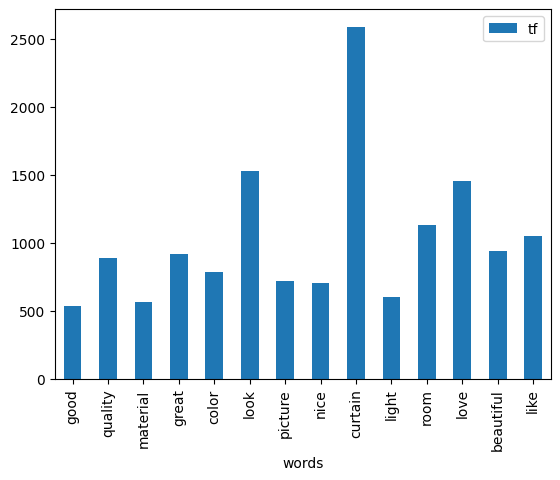

In [12]:
tf[tf["tf"] > 500].plot.bar(x="words", y="tf")
plt.show()

* Burada ratingi düşük olanlar filterelenip en çok kullanılan kelimeler, aynı şekilde büyük olanlar için en çok kullanılan kelimelerin analizi yaplabilir. Başka featurelar burada devreye alınabilir.

#### Wordcloud

* Tek satır text dosyasına etiriyorum. Kendisi frekansı sayıyor.

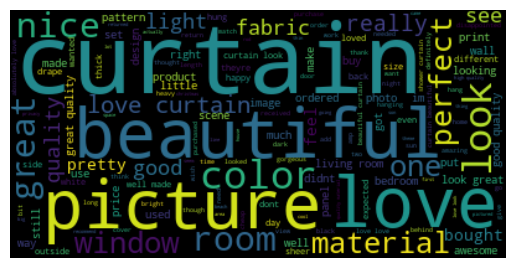

In [13]:
from wordcloud import WordCloud

text = " ".join(i for i in df.Review)

wordcloud = WordCloud().generate(text)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

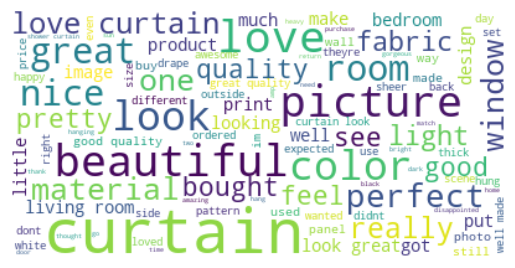

In [14]:
wordcloud = WordCloud(max_font_size=50,
                      max_words=100,
                      background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

wordcloud.to_file("wordcloud.png")#kaydetmek için

#### Şablonlara Göre Wordcloud

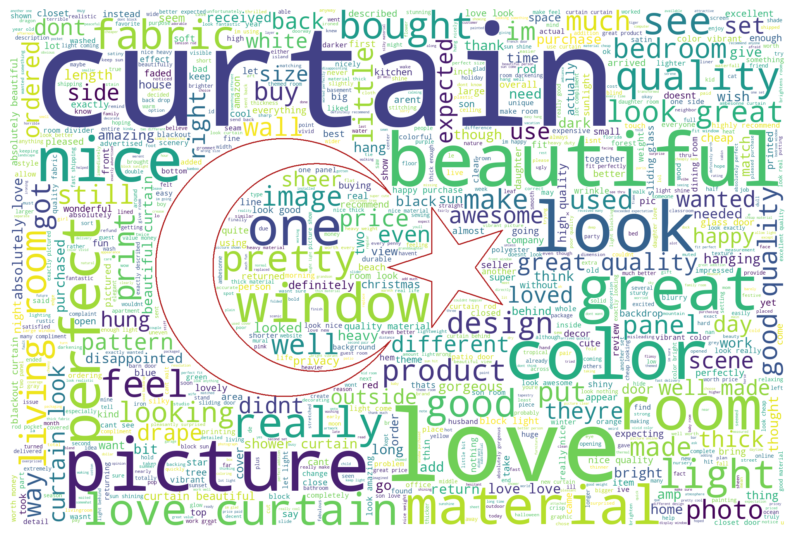

In [15]:
from PIL import Image

tr_mask = np.array(Image.open("tr.png"))

wc = WordCloud(background_color="white",
               max_words=1000,
               mask=tr_mask,
               contour_width=3,
               contour_color="firebrick")

wc.generate(text)
plt.figure(figsize=[10, 10])
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()


## 3. Sentiment Analysis

In [16]:
df["Review"].head()

0                                                happy
1       good quality material however panel mismatched
2    product fun bedroom windowsbr imagery bit stre...
3    lo unico que gustaria e que sean un poco ma la...
4    great bang buck cant believe quality material ...
Name: Review, dtype: object

* Pre-trained model kullanarak duygu durumlarını analiz etmeye çalışacağız.

In [17]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/anilmehmetuyar/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [18]:
from nltk.sentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

* Biz compound skora odaklanıyoruz. Buradan gelecek duygu skorları -1 ile +1 arasında yer almaktadır. Yukarıdaki değerlendirme pozitif iken aşağıdaki değerlendirme negatif yorum almıştır. Ancak bunu korelasyon gibi güç olarak da konuşmak gerekli.

In [19]:
df["Review"][0:10].apply(lambda x: sia.polarity_scores(x))

0    {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...
1    {'neg': 0.0, 'neu': 0.633, 'pos': 0.367, 'comp...
2    {'neg': 0.0, 'neu': 0.647, 'pos': 0.353, 'comp...
3    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
4    {'neg': 0.0, 'neu': 0.517, 'pos': 0.483, 'comp...
5    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
6    {'neg': 0.0, 'neu': 0.631, 'pos': 0.369, 'comp...
7    {'neg': 0.0, 'neu': 0.578, 'pos': 0.422, 'comp...
8    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
9    {'neg': 0.0, 'neu': 0.772, 'pos': 0.228, 'comp...
Name: Review, dtype: object

In [20]:
df["Review"][0:10].apply(lambda x: sia.polarity_scores(x)["compound"])

0   0.57
1   0.44
2   0.72
3   0.00
4   0.90
5   0.00
6   0.62
7   0.91
8   0.00
9   0.71
Name: Review, dtype: float64

* Dataframe bu skore eklenerek burada analizler yapılabilir.

In [21]:
df["polarity_score"] = df["Review"].apply(lambda x: sia.polarity_scores(x)["compound"])
df["polarity_score"]

0      0.57
1      0.44
2      0.72
3      0.00
4      0.90
       ... 
5606   0.77
5607   0.00
5608   0.79
5609   0.84
5610   0.46
Name: polarity_score, Length: 5611, dtype: float64

## 4. Feature Engineering

* 1- Unsupervised başladığımız projede elde ettiğimiz polarity scorelara gööre labellama yaparsam supervised bir yapıya geçebilirim. Binary classification modeli oluşturuabilirim.

* 2- Eğer en başında labelımız olsaydı. (Clustering modeli)Kmeans ile müşterileri segmentasyon yapsam. Yeni müşteri geldiğinde onun hangi segmentasyonda olacağını nasıl belirleyebilirim. Bütün veriyle en baştan mı modelleyeceğim yoksa uzaklık modeli mi kullanacağım? İlgibi kümeler gözlem birimlerine grup olarak atanır. Sonra sınıflandırma problemine çeviririz. Gelen müşterinin hangi sınıfa ait olduğunu gözlemlemiş oluruz.

* 3- Deep Learning Örneği - Verileri segmentasyona ayırıp, yeni bir hücre geldiğinde bunun hangi segmente ait olduğunu bulmak istediğimizi varsayalım. Öncelikle unsupervised yöntemlerle segmentasyona ayırıyorum. Labelleyıp supervised yöntemlerde kullanılacak hale getirelim.

In [22]:
df["Review"][0:10].apply(lambda x: "pos" if sia.polarity_scores(x)["compound"] > 0 else "neg")

0    pos
1    pos
2    pos
3    neg
4    pos
5    neg
6    pos
7    pos
8    neg
9    pos
Name: Review, dtype: object

In [23]:
df["sentiment_label"] = df["Review"].apply(lambda x: "pos" if sia.polarity_scores(x)["compound"] > 0 else "neg")

In [24]:
df["sentiment_label"].value_counts()

sentiment_label
pos    4764
neg     847
Name: count, dtype: int64

* Ben 3 sınıf yapardım neatural da eklerdim. ^e bölerdim polarity score kısmını ya da natural negatif ve natural positive gibi 4 e bölerdim. Bu da bir segmentasyon analiz sürecide belirli gruba yoğunlaşabilirim.

In [25]:
df.groupby("sentiment_label")["Star"].mean()

sentiment_label
neg   3.39
pos   4.59
Name: Star, dtype: float64

In [26]:
df.groupby("sentiment_label")["HelpFul"].mean()

sentiment_label
neg   0.82
pos   1.01
Name: HelpFul, dtype: float64

In [27]:
from sklearn.preprocessing import LabelEncoder

df["sentiment_label"] = LabelEncoder().fit_transform(df["sentiment_label"])

In [28]:
df["sentiment_label"]

0       1
1       1
2       1
3       0
4       1
       ..
5606    1
5607    0
5608    1
5609    1
5610    1
Name: sentiment_label, Length: 5611, dtype: int64

In [29]:
y = df["sentiment_label"]
y

0       1
1       1
2       1
3       0
4       1
       ..
5606    1
5607    0
5608    1
5609    1
5610    1
Name: sentiment_label, Length: 5611, dtype: int64

In [30]:
X = df["Review"]
X
#ama bunlar ölçülemez, ölçülebilir hale getirmemiz lazım.

0                                                   happy
1          good quality material however panel mismatched
2       product fun bedroom windowsbr imagery bit stre...
3       lo unico que gustaria e que sean un poco ma la...
4       great bang buck cant believe quality material ...
                              ...                        
5606    great product reasonable money delivered quick...
5607                                color way panel match
5608    great studio complement entire theme area phot...
5609                         brought beauty kid room love
5610        cute curtain son room thick enough keep light
Name: Review, Length: 5611, dtype: object

### TF-IDF

* TF - Tern Frequency - Olasılık(ağırlık) kullanarak kelimelerin dokümanda bulunmasına yönelik bir standartlaştırma yapıyorum.
* IDF - Inverse Document Frequency

* TF -IDF, tüm corpus ve tüm dökümanlardaki ağırlıkları da hesaba kattığı için daha etkilidir. Count Vectorizer modelinde frekansı yüksek olan kelimelerde yanlılık ortaya çıkartabilir. Standartlaştırılmamış olması örüntüyü bozabilir.

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf_idf_word_vectorizer = TfidfVectorizer()
X_tf_idf_word = tf_idf_word_vectorizer.fit_transform(X)
X_tf_idf_word

<5611x5248 sparse matrix of type '<class 'numpy.float64'>'
	with 61820 stored elements in Compressed Sparse Row format>

In [32]:
tf_idf_ngram_vectorizer = TfidfVectorizer(ngram_range=(2, 3))
X_tf_idf_ngram = tf_idf_ngram_vectorizer.fit_transform(X)
X_tf_idf_ngram

<5611x90919 sparse matrix of type '<class 'numpy.float64'>'
	with 116702 stored elements in Compressed Sparse Row format>

## 5. Sentiment Modeling

### Logistic Regression

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, GridSearchCV, cross_validate

In [34]:
log_model = LogisticRegression().fit(X_tf_idf_word, y)

In [35]:
cross_val_score(log_model,
                X_tf_idf_word,
                y,
                scoring="accuracy",
                cv=5).mean()

0.8911060740980599

In [36]:
new_review = pd.Series("this product is great")
new_review = TfidfVectorizer().fit(X).transform(new_review)
log_model.predict(new_review)

array([1])

In [37]:
new_review = pd.Series("look at that shit very bad")
new_review = TfidfVectorizer().fit(X).transform(new_review)
log_model.predict(new_review)

array([0])

In [38]:
new_review = pd.Series("it was good but I am sure that it fits me")
new_review = TfidfVectorizer().fit(X).transform(new_review)
log_model.predict(new_review)

array([1])

In [39]:
random_review = pd.Series(df["Review"].sample(1).values)
new_review = TfidfVectorizer().fit(X).transform(random_review)
log_model.predict(new_review)

array([1])

#### Random Forests

* Count Vectors

In [40]:
from sklearn.ensemble import RandomForestClassifier

* TF-IDF Word-Level

In [41]:
rf_model = RandomForestClassifier().fit(X_tf_idf_word, y)
cross_val_score(rf_model, X_tf_idf_word, y, cv=5, n_jobs=-1).mean()

0.9149899286193875

* TF-IDF N-GRAM

In [42]:
rf_model = RandomForestClassifier().fit(X_tf_idf_ngram, y)
cross_val_score(rf_model, X_tf_idf_ngram, y, cv=5, n_jobs=-1).mean()

0.8533243492491305

#### Hiperparametre Optimizasyonu

In [43]:
rf_model = RandomForestClassifier(random_state=17)

In [44]:
rf_params = {"max_depth": [8, None],
             "max_features": [7, "auto"],
             "min_samples_split": [2, 5, 8],
             "n_estimators": [100, 200]}

rf_best_grid = GridSearchCV(rf_model,
                            rf_params,
                            cv=5,
                            n_jobs=-1,
                            verbose=1).fit(X_tf_idf_word, y)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


In [45]:
rf_best_grid.best_params_

{'max_depth': None,
 'max_features': 7,
 'min_samples_split': 2,
 'n_estimators': 200}

In [46]:
rf_final = rf_model.set_params(**rf_best_grid.best_params_, random_state=17).fit(X_tf_idf_word, y)

In [47]:
cross_val_score(rf_final, X_tf_idf_word, y, cv=5, n_jobs=-1).mean()

0.905365212546607